# Estimating the Number of Unique Terms Generated from a Zipfian Distribution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex
import pandas as pd
from datetime import datetime
import time
from itertools import product, combinations_with_replacement, permutations, combinations
import scipy.stats as stats

**The Task** <br>
- Find the expectation of the number of unique items that will occur from *d* draws of a discrete distribution.
- Find out what the big O notation is for the calculation.
- Visualize the estimated values for the expectaed values using bootstrapping to maybe find a simple generalizable formula.

## Uniform Distribution

In [2]:
def uniform(arr):
    p = [1/len(arr)]*len(arr)
    return p

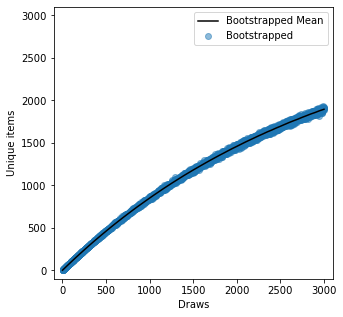

In [3]:
N = 3000
D = 3000

items = np.arange(1,N+1)
p = uniform(items)
n_unique = []
n_unique_boot = []
n_values = []
n_values_boot = []

for d in range(1,D+1):
    values = np.random.choice(items, size=d, p=p)
    n_unique.append(len(np.unique(values)))
    n_values.append(d)
    
    if (d%50==0) | (d==1):
        values_boot = [len(np.unique(np.random.choice(items, size=d, p=p))) for _ in range(1000)]
        n_unique_boot.append(np.mean(values_boot))
        n_values_boot.append(d)

n_unique = np.asarray(n_unique)
n_unique_boot = np.asarray(n_unique_boot)

plt.figure(figsize=(5,5))
plt.scatter(n_values, n_unique, alpha=0.5, label="Bootstrapped")
plt.plot(n_values_boot, n_unique_boot, zorder=1, color="black", label="Bootstrapped Mean")

plt.legend(loc="best")
plt.xlabel("Draws")
plt.ylabel("Unique items")
plt.xlim(-100,3100)
plt.ylim(-100,3100)
plt.show()

## Zipfian Distribution
When learning about Natural Language Processing one inevitably comes accross Zipf's Law, which states, acording to wikipedia, that *the frequency of any word is inversely proportional to its rank in the frequency table*. In essence this means that the most common words make up most words of a language. More specifically the first word will be twice as common as the second most common word and three times as common as the third most common word and so on. <br>
<br>
<center>$\displaystyle f(k;s,N)=\frac{\frac{1}{k^{s}}}{\sum\limits _{n=1} ^{N}\Big(\frac{1}{n^{s}}\Big)}$</center><br>

In [3]:
def zipfian(k,s=1):
    numerator = 1/(k**s)
    harmonic_number = np.sum(1/(k**s))
    return numerator/harmonic_number

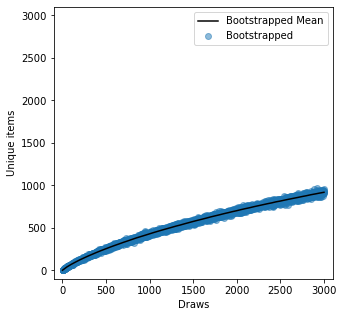

In [5]:
N = 3000
D = 3000

items = np.arange(1,N+1)
p = zipfian(items, s=1)
n_unique = []
n_unique_boot = []
n_values = []
n_values_boot = []

for d in range(1,D+1):
    values = np.random.choice(items, size=d, p=p)
    n_unique.append(len(np.unique(values)))
    n_values.append(d)
    
    if (d%50==0) | (d==1):
        values_boot = [len(np.unique(np.random.choice(items, size=d, p=p))) for _ in range(1000)]
        n_unique_boot.append(np.mean(values_boot))
        n_values_boot.append(d)

n_unique = np.asarray(n_unique)
n_unique_boot = np.asarray(n_unique_boot)

plt.figure(figsize=(5,5))
plt.scatter(n_values, n_unique, alpha=0.5, label="Bootstrapped")
plt.plot(n_values_boot, n_unique_boot, zorder=1, color="black", label="Bootstrapped Mean")

plt.legend(loc="best")
plt.xlabel("Draws")
plt.ylabel("Unique items")
plt.xlim(-100,3100)
plt.ylim(-100,3100)
plt.show()

## Maths

### Existing Solutions

In [94]:
N = 4
D = 4

print(N*((N**D-(N-1)**D)/(N**D)))
print(N-((N-1)**N)/(N**(N-1)))

2.734375
2.734375


### Method 1 & 2

In [4]:
## Method 1
def method_1(p,D):
    cartesian_prod_of_prob = np.asarray(list(product(p, repeat=D))) # Cartesian Product
    cartesian_prod_of_items = np.asarray(list(product(items, repeat=D)))
    prod_of_cartesian_prod = np.prod(cartesian_prod_of_prob, axis=1) # Product along rows

    def n_unique(arr):
        return len(set(arr))

    num_uniques = np.asarray(list(map(n_unique, cartesian_prod_of_items))) # Unique items per row
    
    return np.sum(num_uniques * prod_of_cartesian_prod)


## Method 2 (Same as method 1 but half)
def method_2(p,D):
    def n_unique(arr):
        return len(set(arr))

    cartesian_prod_of_prob = np.asarray(list(product(p, repeat=D))) # Cartesian Product
    cartesian_prod_of_items = np.asarray(list(product(items, repeat=D)))

    half = int(len(cartesian_prod_of_prob)/2)
    if len(cartesian_prod_of_prob)%2==1:
        ## Cartesian Products
        cartesian_prod_of_prob = cartesian_prod_of_prob[:half+1,:]
        cartesian_prod_of_items = cartesian_prod_of_items[:half+1,:]
        
        prod_of_cartesian_prod = np.prod(cartesian_prod_of_prob, axis=1)
        num_uniques = np.asarray(list(map(n_unique, cartesian_prod_of_items)))
        
        return np.sum(num_uniques[:-1] * prod_of_cartesian_prod[:-1])*2 + (num_uniques[-1] * prod_of_cartesian_prod[-1])

    else:
        ## Cartesian Products
        cartesian_prod_of_prob = cartesian_prod_of_prob[:half,:]
        cartesian_prod_of_items = cartesian_prod_of_items[:half,:]
        
        prod_of_cartesian_prod = np.prod(cartesian_prod_of_prob, axis=1)
        num_uniques = np.asarray(list(map(n_unique, cartesian_prod_of_items)))
        
        return np.sum(num_uniques * prod_of_cartesian_prod)*2

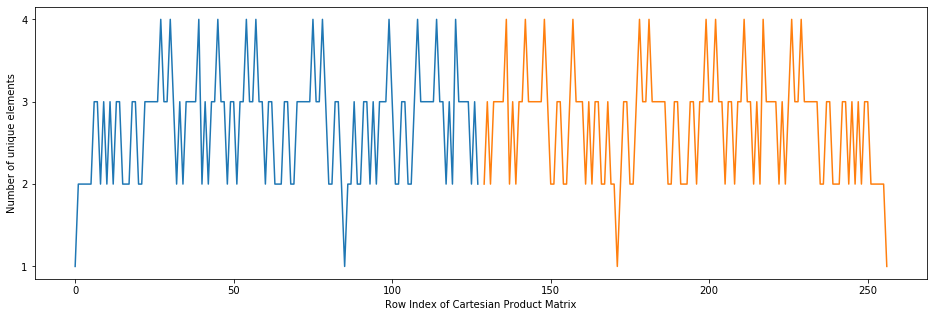

In [5]:
def n_unique(arr):
    return len(set(arr))

D = 4 # Draws
N = 4 # Items

items = np.arange(1,N+1)
# p = zipfian(items)
p = uniform(items)

cartesian_prod_of_items = np.asarray(list(product(items, repeat=D)))
num_uniques = np.asarray(list(map(n_unique, cartesian_prod_of_items)))

half = int(len(num_uniques)/2)

plt.figure(figsize=(16,5))
if len(num_uniques)%2==1:
    plt.plot(range(half),num_uniques[:half])
    plt.scatter([half], num_uniques[half])
    plt.plot(range(half+1,half*2+1), num_uniques[half+1:])
else:
    plt.plot(range(half),num_uniques[:half])
    plt.plot(range(half+1,half*2+1), num_uniques[half:])
plt.yticks([1,2,3,4],[1,2,3,4])
plt.ylabel("Number of unique elements")
plt.xlabel("Row Index of Cartesian Product Matrix")
plt.title("")
plt.savefig("images/symetry_of_cartesian_prod.png",bbox_inches="tight")
plt.show()

### Evaluation of Calculation Methods

In [359]:
D = 6 # Draws
N = 6 # Items

items = np.arange(1,N+1)
p = zipfian(items)
# p = uniform(items)

print("Bootstrapped estimated mean unique terms (bootstraps=100,000)")
start_time = time.perf_counter()
print("Est: ",np.mean([len(np.unique(np.random.choice(items, size=D, p=p))) for _ in range(100000)]))
print("Time: ", time.perf_counter() - start_time)
print()

print("Time taken to calculate exact mean of unique terms")
print()

print("Catersian Product")
start_time = time.perf_counter()
print("Value:", method_1(p,D))
time1 = time.perf_counter() - start_time
print("Time: ", time1)
print()

print("Half Catersian Product")
start_time = time.perf_counter()
print("Value:", method_2(p,D))
time2 = time.perf_counter() - start_time
print("Time: ", time2)
print(time1/time2)

Bootstrapped estimated mean unique terms (bootstraps=100000)
Est:  3.50598
Time:  4.836008199956268

Time taken to calculate exact mean of unique terms

Catersian Product
Value: 3.5075248928541916
Time:  0.150888399919495

Half Catersian Product
Value: 5.0895068152952145
Time:  0.10704760008957237
1.4095449107989222


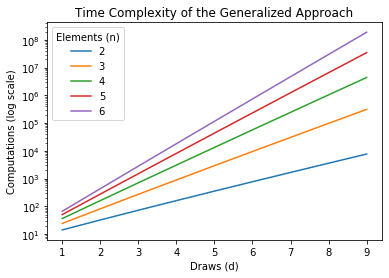

In [691]:
D = np.arange(1,10)

for n in range(2,7):
    plt.plot(D, (4+D+n)*(n**D), label=n)
plt.yscale("log")
plt.legend(title="Elements (n)")
plt.ylabel("Computations (log scale)")
plt.xlabel("Draws (d)")
plt.title("Time Complexity of the Generalized Approach")
plt.savefig("images/time_complexity.png", bbox_inches="tight")

Estimating standard error for the bootstrap method.

In [452]:
# values = []
print("|"+"-"*30+"|")
print("|",end="")
for _ in range(30):
    values.append(np.mean([len(np.unique(np.random.choice(items, size=D, p=p))) for _ in range(100000)]))
    print("=",end="")
print("|")

|------------------------------|
|==============================|


In [438]:
mu = method_1(p,D)

Mu_hat: 3.5074322424242426 
   Mu = 3.5075248928541916
Standard Error: 0.00279 (n=330)


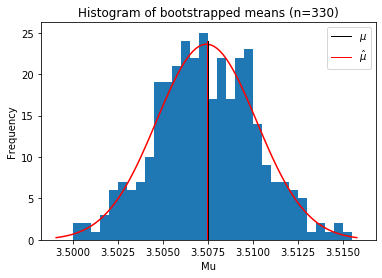

In [453]:
plt.hist(values, bins=np.arange(3.5,3.516,0.0005), density=False)

mu_hat = np.mean(values)
std_er = np.std(values)
normal_range = np.linspace(mu_hat - 3*std_er, mu_hat + 3*std_er, 100)
plt.plot(normal_range, stats.norm.pdf(normal_range, mu_hat, std_er)*(len(values)/2000), color="red")
plt.plot([mu,mu],[0,24], color="black", lw=1, label=r"$\mu$")
plt.plot([mu_hat,mu_hat],[0,24], color="red", lw=1, label=r"$\hat\mu$")
plt.legend()
plt.xlabel("Mu")
plt.ylabel("Frequency")
plt.title(f"Histogram of bootstrapped means (n={len(values)})")
plt.savefig("images/bootstrap_hist.png", bbox_inches="tight")
print(f"Mu_hat: {mu_hat} \n   Mu = {mu}")
print(f"Standard Error: {std_er:.5f} (n={len(values)})")

Testing calculation times

In [355]:
D = 11 # Draws
N = 4 # Items

method1 = []
# method2 = []

for n in [4]: #range(1, N+1):
    items = np.arange(1,n+1)
    p = zipfian(items)
    
    m1 = []
    m2 = []
    
    print("|",end="")
    
    for d in range(1,D+1):
        start_time = time.perf_counter()
        method_1(p,d)
        m1.append((time.perf_counter() - start_time))
        
#         start_time = time.perf_counter()
# #         method_2(p,d)
#         np.mean([len(np.unique(np.random.choice(items, size=D, p=p))) for _ in range(100000)])
#         m2.append((time.perf_counter() - start_time))
        print(f"{d:2}",end="")
    
    method1.append(m1)
#     method2.append(m2)
    print("|")

method1 = np.asarray(method1)
# method2 = np.asarray(method2)

| 1 2 3 4 5 6 7 8 91011|


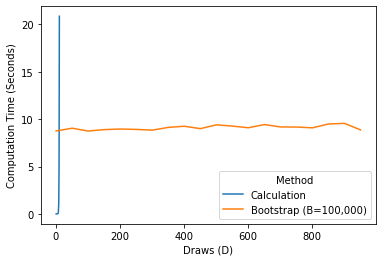

In [358]:
plt.plot(range(1, 11+1),method1.T, label="Method 1")
plt.plot(range(1, 1000+1,50), method2.T, label="Method 2")
plt.ylabel("Computation Time (Seconds)")
plt.xlabel("Draws (D)")
# plt.xticks(ticks=list(range(D)), labels=[i for i in range(1,D+1)])
# plt.xlabel("Items (N)")
# plt.xticks(ticks=list(range(method1.shape[0])), labels=[i for i in range(1,N+1)])
# plt.yscale("log")
plt.legend(["Calculation","Bootstrap (B=100,000)"],title="Method", loc="lower right")
plt.savefig("images/Calc_v_boot (Draws)",bbox_inches="tight")
plt.show()

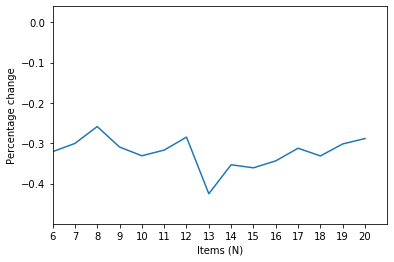

In [315]:
plt.plot((method2-method1)/method1, label="Ratio")
plt.ylabel("Percentage change")
plt.xlabel("Items (N)")
plt.xticks(ticks=list(range(method1.shape[0])), labels=[i for i in range(1,N+1)])
# plt.xlabel("Draws (D)")
# plt.xticks(ticks=list(range(D)), labels=[i for i in range(1,D+1)])
plt.xlim(5,20)
# plt.ylim(-1,1)
# plt.yscale("log")
# plt.legend(title="Method")
plt.show()

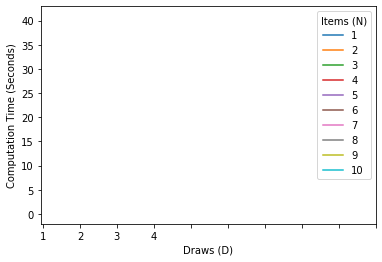

In [22]:
plt.plot(method1.T)
plt.ylabel("Computation Time (Seconds)")
plt.xlabel("Draws (D)")
plt.xticks(ticks=list(range(D)), labels=[i for i in range(1,D+1)])
# plt.yscale("log")
plt.legend([i for i in range(1,N+1)], title="Items (N)")
# plt.savefig("images/Draws.png")
plt.show()

In [692]:
plt.plot(method1)
plt.ylabel("Computation Time (Seconds)")
plt.xlabel("Items (N)")
plt.xticks(ticks=list(range(method1.shape[0])), labels=[i for i in range(1,N+1,5)])
plt.yscale("log")
plt.legend([i for i in range(1,D+1)], title="Draws (D)")
# plt.savefig("images/Items.png")
plt.show()

<table><tr>
<td> <center> Main Variable </center> </td>
<td> <center> Linear scale </center> </td>
<td> <center> Log Scale </center> </td>
<td> <center> Calculation vs. Bootstrapping </center> </td>
<tr>
<td> <center> Items (N) </center> </td>
<td> <img src="images/Items.png" style="width: 300px;"/> </td>
<td> <img src="images/Items (log).png" style="width: 300px;"/> </td>
<td> <img src="images/Calc_v_boot (Items).png" style="width: 300px;"/> <center>D=4</center> </td>
<tr>
<td> <center> Draws (D) </center> </td>
<td> <img src="images/Draws.png" style="width: 300px;"/> </td>
<td> <img src="images/Draws (log).png" style="width: 300px;"/> </td>
<td> <img src="images/Calc_v_boot (Draws).png" style="width: 300px;"/> <center>N=4</center> </td>
</tr></table>

## Estimation

In [573]:
D = 10 ## Draws
# N = 9 ## Items

values = []

for n in [2,3,4,10,100]: #range(1, N+1):
    items = np.arange(1,n+1)
#     p = zipfian(items)
    p = uniform(items)
    val = []
    print(f"{n:>5} |",end="")
    
    for d in range(1,D+1):        
#         val.append(np.mean([len(np.unique(np.random.choice(items, size=d, p=p))) for _ in range(100000)]))
        val.append(n*((n**d-(n-1)**d)/(n**d))) ## Only works for uniform distribution
        print("=",end="")
    
    values.append(val)
    print("|")

# values_zip = np.asarray(values)
values_uni = np.asarray(values)

    2 |==========|
    3 |==========|
    4 |==========|
   10 |==========|
  100 |==========|


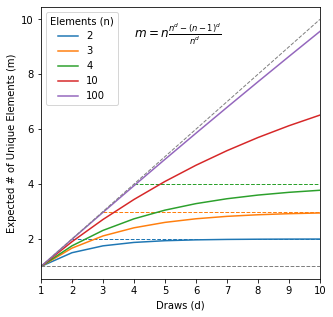

In [568]:
c = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.figure(figsize=(5,5))
plt.plot(values.T)
plt.plot([0,9],[1,10], color="grey", linestyle="dashed", lw=1)
plt.plot([0,9],[1,1], color="grey", linestyle="dashed", lw=1)
plt.plot([1,9],[2,2], color=f"{c[0]}", linestyle="dashed", zorder=0, lw=1)
plt.plot([2,9],[3,3], color=f"{c[1]}", linestyle="dashed", zorder=0, lw=1)
plt.plot([3,9],[4,4], color=f"{c[2]}", linestyle="dashed", zorder=0, lw=1)
# plt.fill([0,9,9],[1,1,10], color="#D3D3D3", zorder=-1)
plt.ylabel("Expected # of Unique Elements (m)")
plt.xlabel("Draws (d)")
plt.xticks(ticks=list(range(D)), labels=[i for i in range(1,D+1)])
plt.xlim(0,9)

# plt.legend([i for i in range(1,N+1)], title="Items (N)")
plt.legend([2,3,4,10,100], title="Elements (n)")
plt.text(3,9.3,r"$m = n\frac{n^{d}-(n-1)^{d}}{n^{d}}$", size=12)

# plt.savefig("images/limits.png", bbox_inches="tight")
plt.show()

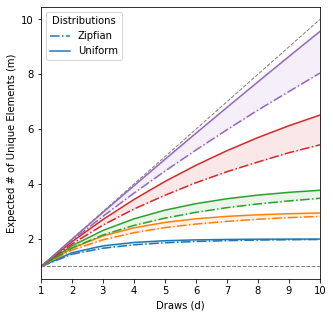

In [589]:
plt.figure(figsize=(5,5))
for i in range(5):
    plt.plot(values_zip.T[:,i], color=f"{c[i]}", linestyle="-.")
    plt.plot(values_uni.T[:,i], color=f"{c[i]}")
    plt.fill_between(np.arange(0,10),values_zip.T[:,i],values_uni.T[:,i],color=f"{c[i]}",alpha=0.1)

plt.plot([0,9],[1,10], color="grey", linestyle="dashed", lw=1)
plt.plot([0,9],[1,1], color="grey", linestyle="dashed", lw=1)

plt.ylabel("Expected # of Unique Elements (m)")
plt.xlabel("Draws (d)")
plt.xticks(ticks=list(range(D)), labels=[i for i in range(1,D+1)])
plt.xlim(0,9)
plt.legend(["Zipfian","Uniform"], title="Distributions")
plt.savefig("images/different_distributions.png", bbox_inches="tight")
plt.show()

#### Archived Estimates

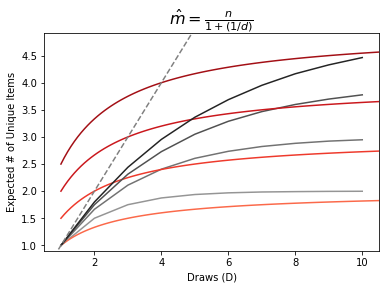

In [530]:
cmap_reds = plt.get_cmap("Reds")
cmap_greys = plt.get_cmap("Greys")

for i,N in enumerate([2,3,4,5]):
    estimates = [N/(1+1/d) for d in np.arange(1,11,0.1)]
    plt.plot([i for i in range(1,11)], values[N-1,:], color=rgb2hex(cmap_greys(i/8+0.5)))
    plt.plot(np.arange(1,11,0.1), estimates,  color=rgb2hex(cmap_reds(i/8+0.5)))

plt.plot([0,5],[0,5], color="grey", linestyle="dashed")
plt.title(r"$\hat m = \frac{n}{1+(1/d)}$", size=16)
plt.ylabel("Expected # of Unique Items")
plt.xlabel("Draws (D)")
plt.ylim(0.9,values[N-1,-1]*1.1)
plt.xlim(0.5,10.5)
plt.savefig("images/estimation_1.png", bbox_inches="tight")
plt.show()

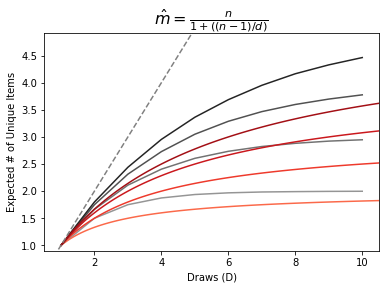

In [531]:
cmap_reds = plt.get_cmap("Reds")
cmap_greys = plt.get_cmap("Greys")

for i,N in enumerate([2,3,4,5]):
    estimates = [N/(1+(N-1)/d) for d in np.arange(1,11,0.1)]
    plt.plot([i for i in range(1,11)], values[N-1,:], color=rgb2hex(cmap_greys(i/8+0.5)))
    plt.plot(np.arange(1,11,0.1), estimates,  color=rgb2hex(cmap_reds(i/8+0.5)))

plt.plot([0,5],[0,5], color="grey", linestyle="dashed")
plt.title(r"$\hat m = \frac{n}{1+((n-1)/d)}$", size=16)
plt.ylabel("Expected # of Unique Items")
plt.xlabel("Draws (D)")
plt.ylim(0.9,values[N-1,-1]*1.1)
plt.xlim(0.5,10.5)
plt.savefig("images/estimation_2.png", bbox_inches="tight")
plt.show()

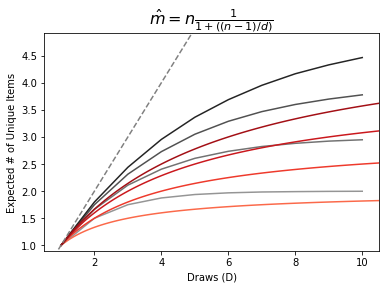

In [539]:
cmap_reds = plt.get_cmap("Reds")
cmap_greys = plt.get_cmap("Greys")

for i,n in enumerate([2,3,4,5]):
    estimates = [n*(1/(1+(n-1)/d)) for d in np.arange(1,11,0.1)]
    plt.plot([i for i in range(1,11)], values[n-1,:], color=rgb2hex(cmap_greys(i/8+0.5)))
    plt.plot(np.arange(1,11,0.1), estimates,  color=rgb2hex(cmap_reds(i/8+0.5)))

plt.plot([0,5],[0,5], color="grey", linestyle="dashed")
plt.title(r"$\hat m = n\frac{1}{1+((n-1)/d)}$", size=16)
plt.ylabel("Expected # of Unique Items")
plt.xlabel("Draws (D)")
plt.ylim(0.9,values[n-1,-1]*1.1)
plt.xlim(0.5,10.5)
plt.savefig("images/estimation_3.png", bbox_inches="tight")
plt.show()

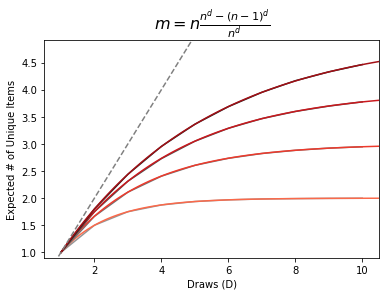

In [538]:
cmap_reds = plt.get_cmap("Reds")
cmap_greys = plt.get_cmap("Greys")

for i,n in enumerate([2,3,4,5]):
    estimates = [n*((n**d-(n-1)**d)/(n**d)) for d in np.arange(1,11,0.1)]
    plt.plot([i for i in range(1,11)], values[n-1,:], color=rgb2hex(cmap_greys(i/8+0.5)))
    plt.plot(np.arange(1,11,0.1), estimates,  color=rgb2hex(cmap_reds(i/8+0.5)))

plt.plot([0,5],[0,5], color="grey", linestyle="dashed")
plt.title(r"$m = n\frac{n^{d}-(n-1)^{d}}{n^{d}}$", size=16)
plt.ylabel("Expected # of Unique Items")
plt.xlabel("Draws (D)")
plt.ylim(0.9,values[n-1,-1]*1.1)
plt.xlim(0.5,10.5)
plt.savefig("images/estimation_uniform.png", bbox_inches="tight")
plt.show()